# **Induced Pairing**

In [5]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

from MTI_Second_Order import FMTI2_NeumannBC


# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]


# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=z, Z=z, z0=0, kx=0.001, ky=0., L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma) for z in lattice])
print(F2.shape)

(250, 4, 4)


### Check on Antisymmetry

In order to satisy the Pauli principle, the anomalous Green's fucntion must satisfy the following antisymmetry relation:
$$
    \mathcal{F}^{\dagger}_{\alpha\beta}(k_x,k_y; z,z';\omega) = - \mathcal{F}^{\dagger}_{\beta\alpha}(-k_x,-k_y; z',z;-\omega) \,.
$$

In [8]:
f = FMTI2_NeumannBC(d=d, z=10, Z=70, z0=0., kx=0.02, ky=-0.051, L=L, mu=mu, Delta=Delta, omega=0.02, Gamma=Gamma)
print(f)
print()

finv = FMTI2_NeumannBC(d=d, z=70, Z=10, z0=0., kx=-0.02, ky=0.051, L=L, mu=mu, Delta=Delta, omega=-0.02, Gamma=Gamma)
print(-finv)
print()
print()

div = np.divide( f, np.transpose(finv) )
print(div.real)

[[ 1.39891315e-05-2.78620799e-05j -2.38144618e-05+1.98577236e-05j
  -2.42205780e-05+1.35831208e-06j -7.45230174e-06-2.73473713e-05j]
 [-9.07573007e-06-2.96132552e-05j -3.11063395e-06+3.03973424e-05j
  -1.62074504e-05+1.76913682e-05j -2.43183741e-05-1.39450689e-05j]
 [-9.49255963e-06+3.18354994e-05j  2.17562903e-05-2.33522874e-05j
   2.44091878e-05-4.90113937e-06j  1.05517686e-05+2.56606556e-05j]
 [ 4.29797856e-06+3.29718323e-05j  9.17892896e-06-2.96928229e-05j
   1.95594299e-05-1.47990068e-05j  2.09052261e-05+1.74355250e-05j]]

[[ 1.39891315e-05-2.78620799e-05j -9.07573007e-06-2.96132552e-05j
  -9.49255963e-06+3.18354994e-05j  4.29797856e-06+3.29718323e-05j]
 [-2.38144618e-05+1.98577236e-05j -3.11063395e-06+3.03973424e-05j
   2.17562903e-05-2.33522874e-05j  9.17892896e-06-2.96928229e-05j]
 [-2.42205780e-05+1.35831208e-06j -1.62074504e-05+1.76913682e-05j
   2.44091878e-05-4.90113937e-06j  1.95594299e-05-1.47990068e-05j]
 [-7.45230174e-06-2.73473713e-05j -2.43183741e-05-1.39450689e-05j
 

## Spatial Dependence

#### <font color='green'> **Absolute Value** </font> 

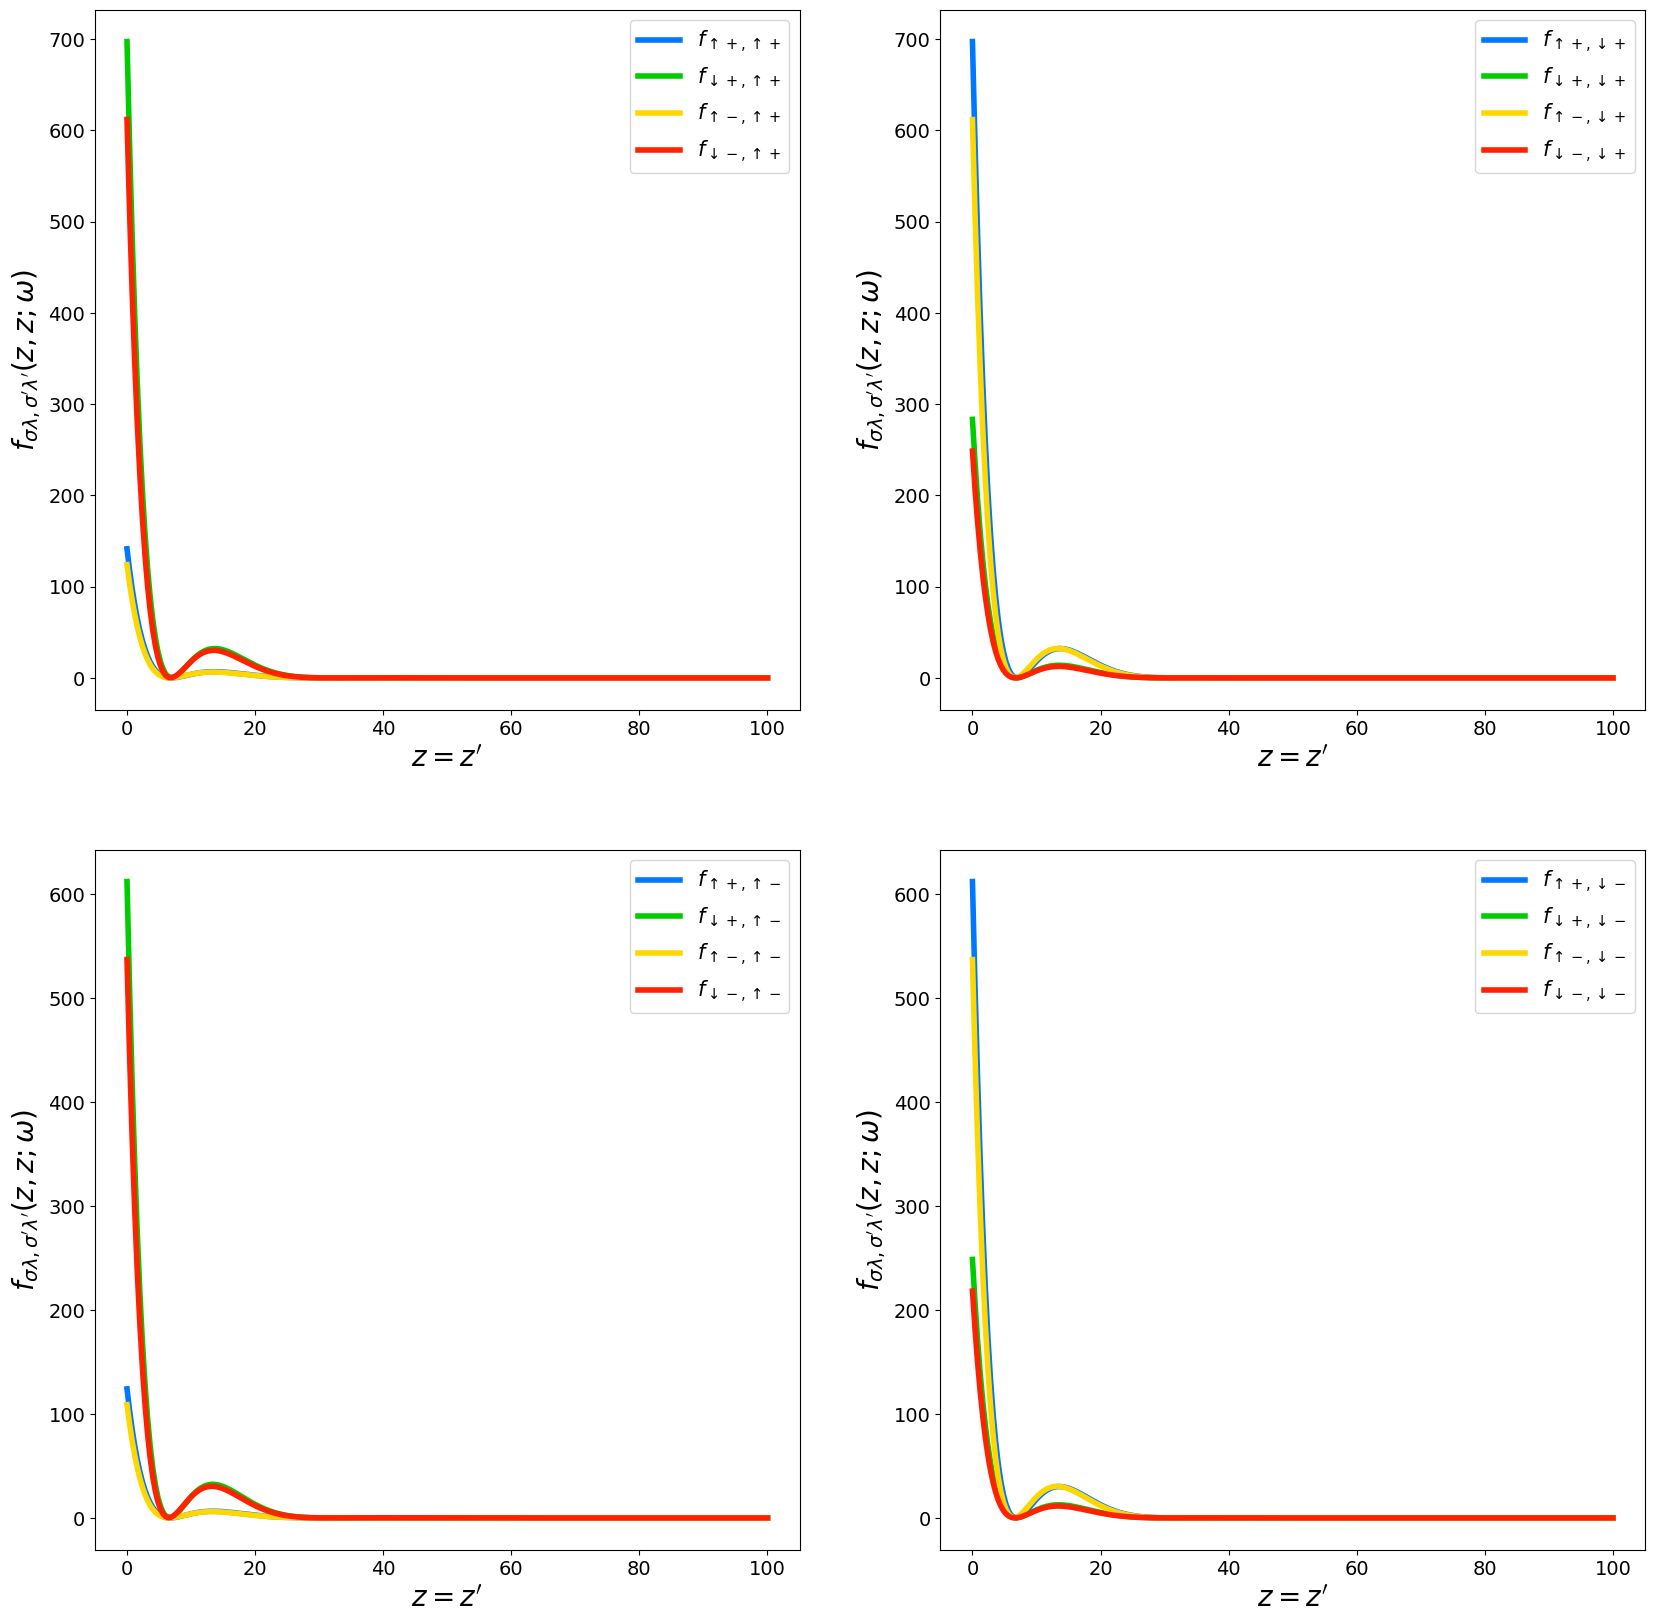

In [7]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(lattice, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )

    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15)

## Frequency Dependence

In [ ]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.050; omega = 0.0025; z0=0
# frequency
frequency = np.linspace(-Delta, Delta, 150)
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

F2 = np.array([FMTI2_NeumannBC(d=d, z=5., Z=5., z0=0., kx=0.005, ky=-0.005, L=L, mu=mu, Delta=Delta, omega=f, Gamma=Gamma) for f in frequency])
print(F2.shape)

#### <font color='green'> **Absolute Value** </font> 

In [ ]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        axs[iPic][jPic].axvline(x=Delta, c='black', lw=1.5, ls='--'); axs[iPic][jPic].axvline(x=-Delta, c='black', lw=1.5, ls='--')

        # plot second order correction F2
        axs[iPic][jPic].plot(frequency, abs(F2[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font color='black'> Discrete Fourier Transform </font> 

We switch to relative coordinates 
$$
    Z = \frac12 (z+z') \,, 
    \qquad
    \overline{z} = z-z' \,,
$$
in order to obtain the pairing as a function of center-of-mass $Z$ and relative position $\overline{z}$ of the two electrons forming a Cooper pair.
The opposite transformation from relative coordinates to separate coordinates $z$ and $z'$ is given by
$$
    z = Z+\frac12 \overline{z} \,, 
    \qquad
    z' = Z-\frac12 \overline{z} \,.
$$
Fixed the center of mass coordinate $Z$ of the Cooper pair, we can perform a *discrete Fourier transform* over the relative coordinate as
$$
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z, k) = \sum_{\overline{z}} e^{-i k \overline{z}} 
    \mathcal{F}_{\alpha \beta}^{\dagger}(Z+\frac12 \overline{z}, Z-\frac12 \overline{z}) \,.
$$

#### **Relative Coordinates**

In [ ]:
# Evaluate discrete Fourier transform in relative coordinates
# zrelative=lattice of relative distances z1-z2; # Z0=center of mass of Cooper pair
def DiscreteFT(zrelative, Z0, d, z0, kx, ky, L, mu, Delta, omega, Gamma, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, hbar=1., t=1.):

    # lattice spacing for relative coordinates
    a = abs( zrelative[1]-zrelative[2] ); N = len(zrelative)

    # F2 in relative coordinates
    F2_rc = []; 
    # loop over relative coordinate z
    for z in zrelative:
    
        # separate coordinates z1, z2
        z1 = Z0 + 1/2*z; z2 = Z0 - 1/2*z
    
        # evaluate F2 as function of relative position z for fixed center of mass Z
        F2_rc.append( FMTI2_NeumannBC(d=d, z=z1, Z=z2, z0=z0, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar) )
    
    # array for F2 in relative coordinates
    F2_rc = np.array(F2_rc)
    
    # shift origin in z=0
    F2_rc = np.fft.fftshift(F2_rc)
    # evaluate discrete Fourier transform
    F2_k = np.fft.fft(F2_rc)
    # shift origin in k=0
    F2_k = np.fft.fftshift(F2_k)
    
    # corresponding k values
    k = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=a))
    
    return k, F2_k


# center of mass
Z0 = 1
# lattice for relative distances
zrelative = np.linspace(-10,10,200)
# finite z-lattice
d = 100.; lattice = np.linspace(0., d, 250)
# parameters
kx = 0.00; ky = 0.00; mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.; z0=0
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])
#Gamma = np.matrix([[2,1],[1,2],[2,1],[1,2]])

# compute discrete FT
k, F2_k = DiscreteFT(zrelative, Z0, d, z0, kx, ky, L, mu, Delta, omega, Gamma)
print(k.shape, F2_k.shape)

In [ ]:
# colors
colors = colors_abs
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))


# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot second order correction F2
        axs[iPic][jPic].plot(k, abs(F2_k[:,irow,icol]), c=colors[irow], lw=4, label=Flabels[irow][icol] )
    
    axs[iPic][jPic].set_xlabel("$k$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$f_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### **Pairing Symmetry**

In [ ]:
F = F2_k

F_inv = np.conj(F[::-1, :, :])

F_even = 0.5 * (F + F_inv)
F_odd  = 0.5 * (F - F_inv)

F_even_inv = np.conj(F_even[::-1, :, :])
F_odd_inv = np.conj(F_odd[::-1, :, :])

'''
print(F_odd[0])
print()
print(F_odd_inv[0])
'''

Fk = np.linalg.norm(F, axis=(1, 2))
even_k = np.linalg.norm(F_even, axis=(1, 2))
odd_k = np.linalg.norm(F_odd, axis=(1, 2))

for idx in range(len(Fk)):
    
    even_fraction = np.linalg.norm(even_k) / np.linalg.norm(Fk)
    odd_fraction  = np.linalg.norm(odd_k) / np.linalg.norm(Fk)

    print(even_fraction, odd_fraction)